In [25]:
import pandas as pd
import talib
import pynance as pn
import seaborn as sns
import matplotlib.pyplot as plt


In [10]:
data=pd.read_csv('../data/yfinance_data/META_historical_data.csv')
data.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2926 entries, 0 to 2925
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2926 non-null   object 
 1   Open          2926 non-null   float64
 2   High          2926 non-null   float64
 3   Low           2926 non-null   float64
 4   Close         2926 non-null   float64
 5   Adj Close     2926 non-null   float64
 6   Volume        2926 non-null   int64  
 7   Dividends     2926 non-null   float64
 8   Stock Splits  2926 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 205.9+ KB


In [15]:
# Calculate a Simple Moving Average (SMA)
data['SMA_50'] = talib.SMA(data['Open'], timeperiod=50)

# Calculate the Relative Strength Index (RSI)
data['RSI_14'] = talib.RSI(data['Open'], timeperiod=14)

# Calculate the Moving Average Convergence Divergence (MACD)
data['MACD'], data['MACD_signal'], data['MACD_hist'] = talib.MACD(data['Open'], 
                                                            fastperiod=12, 
                                                            slowperiod=26, 
                                                            signalperiod=9)

# Display the first few rows of the DataFrame to verify the calculations
print(data[['Open', 'SMA_50', 'RSI_14', 'MACD', 'MACD_signal', 'MACD_hist']])

            Open      SMA_50     RSI_14      MACD  MACD_signal  MACD_hist
0      28.000000         NaN        NaN       NaN          NaN        NaN
1      27.590000         NaN        NaN       NaN          NaN        NaN
2      28.180000         NaN        NaN       NaN          NaN        NaN
3      26.770000         NaN        NaN       NaN          NaN        NaN
4      26.959999         NaN        NaN       NaN          NaN        NaN
...          ...         ...        ...       ...          ...        ...
2921  472.309998  492.258800  39.012848 -4.822957     0.176402  -4.999359
2922  463.260010  492.069000  36.031548 -6.720195    -1.202918  -5.517278
2923  464.200012  492.085601  36.573715 -8.055066    -2.573347  -5.481719
2924  469.880005  491.983600  39.889026 -8.556004    -3.769879  -4.786126
2925  467.000000  491.823600  38.782105 -9.080717    -4.832046  -4.248671

[2926 rows x 6 columns]


In [18]:
# Check if necessary columns exist
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
if all(col in data.columns for col in required_columns):
    print("All necessary columns are present.")
else:
    print("Some required columns are missing.")

All necessary columns are present.


In [23]:
# Convert 'Date' to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Calculate daily returns
data['returns'] = data['Close'].pct_change()

# Calculate a 50-day simple moving average (SMA)
data['SMA_50'] = talib.SMA(data['Close'], timeperiod=50)

# Calculate the 14-day Relative Strength Index (RSI)
data['RSI_14'] = talib.RSI(data['Close'], timeperiod=14)

# Display the calculated metrics
print(data[['Date', 'Close', 'returns', 'SMA_50', 'RSI_14']].head(50))

         Date      Close   returns   SMA_50     RSI_14
0  2012-12-12  27.580000       NaN      NaN        NaN
1  2012-12-13  28.240000  0.023930      NaN        NaN
2  2012-12-14  26.809999 -0.050637      NaN        NaN
3  2012-12-17  26.750000 -0.002238      NaN        NaN
4  2012-12-18  27.709999  0.035888      NaN        NaN
5  2012-12-19  27.410000 -0.010826      NaN        NaN
6  2012-12-20  27.360001 -0.001824      NaN        NaN
7  2012-12-21  26.260000 -0.040205      NaN        NaN
8  2012-12-24  26.930000  0.025514      NaN        NaN
9  2012-12-26  26.510000 -0.015596      NaN        NaN
10 2012-12-27  26.049999 -0.017352      NaN        NaN
11 2012-12-28  25.910000 -0.005374      NaN        NaN
12 2012-12-31  26.620001  0.027403      NaN        NaN
13 2013-01-02  28.000000  0.051841      NaN        NaN
14 2013-01-03  27.770000 -0.008214      NaN  51.108521
15 2013-01-04  28.760000  0.035650      NaN  56.517924
16 2013-01-07  29.420000  0.022949      NaN  59.717730
17 2013-01

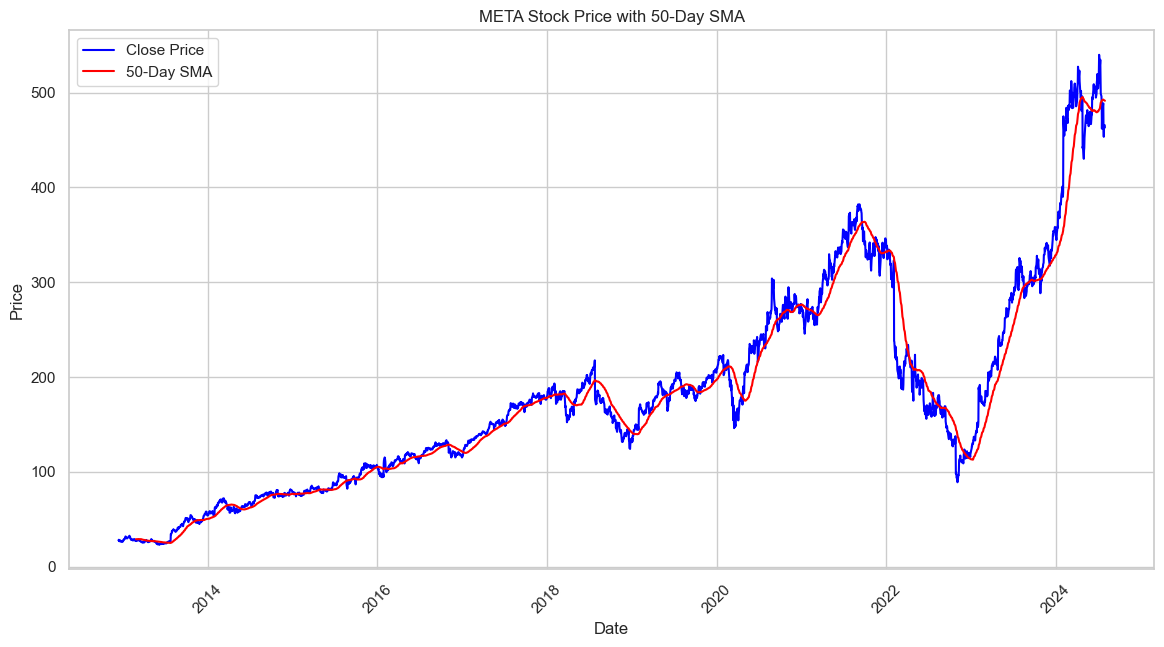

In [26]:
# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure and axis for stock price and SMA
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the closing price
ax1.plot(data['Date'], data['Close'], label='Close Price', color='blue')
# Plot the 50-day SMA
ax1.plot(data['Date'], data['SMA_50'], label='50-Day SMA', color='red')

# Set labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Price')
ax1.set_title('META Stock Price with 50-Day SMA')
ax1.legend()

# Rotate x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()
